In [82]:
import xarray as xr
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter

ds = xr.open_dataset('./era5_WY2016.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 5, latitude: 5, time: 7320)
Coordinates:
  * longitude  (longitude) float32 -124.0 -123.8 -123.5 -123.2 -123.0
  * latitude   (latitude) float32 48.0 47.75 47.5 47.25 47.0
  * time       (time) datetime64[ns] 2015-10-01 ... 2016-07-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    ssrd       (time, latitude, longitude) float32 ...
    strd       (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-03-07 19:05:28 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [83]:
# Extract latitude, longitude, and temperature variables from the xarray dataset
latitudes = ds['latitude'].values
longitudes = ds['longitude'].values
temperatures = ds['t2m'].values
times = ds['time'].values

In [84]:
temperatures.shape

(7320, 5, 5)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_107/20956085.py:2: SyntaxWarning: invalid escape sequence '\d'
  ds.plot.scatter(x='longitude', y='latitude', ax=ax, label='ERA5 0.25$\degree$ x 0.25$\degree$\nGrid Point Centroids',


Text(0.5, 1.0, 'ERA5 Grid Cells and Buckinghorse SNOTEL')

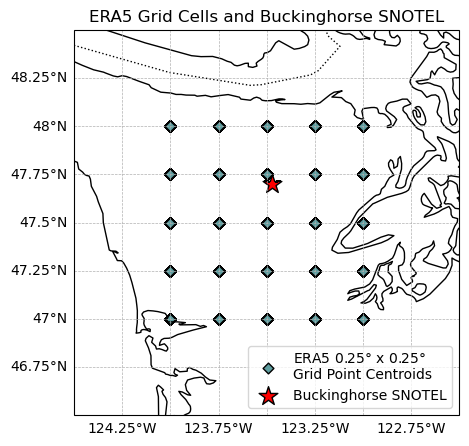

In [113]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10,5))
ds.plot.scatter(x='longitude', y='latitude', ax=ax, label='ERA5 0.25$\degree$ x 0.25$\degree$\nGrid Point Centroids',
               c='cadetblue', ec='k', marker='D', s=30)
ax.scatter(-123.47, 47.7, c='r', marker='*', s=200, ec='k', label='Buckinghorse SNOTEL')

# Add latitude and longitude axis labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=0.5)
gl.top_labels = False  # Turn off top labels
gl.right_labels = False  # Turn off right labels
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

# state outlines
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, edgecolor='black')
ax.set_xlim(-124.5, -122.5)
ax.set_ylim(46.5, 48.5)

ax.legend(loc='lower right')
ax.set_title('ERA5 Grid Cells and Buckinghorse SNOTEL')

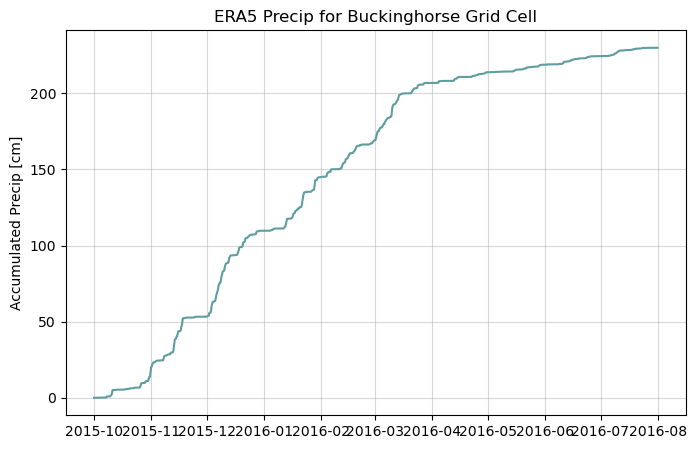

In [87]:
# Specify the latitude and longitude values you're interested in
target_lat = 47.43
target_lon = -123.27

# Select data for the specified latitude and longitude using the sel method
buck = ds.sel(latitude=target_lat, longitude=target_lon, method='nearest')

# Print the selected data
plt.figure(figsize=(8,5))
buck = buck.to_dataframe()
plt.plot(buck.tp.cumsum()*100, color='cadetblue')
plt.title('ERA5 Precip for Buckinghorse Grid Cell')
plt.ylabel('Accumulated Precip [cm]')
plt.grid(alpha=0.5)

In [88]:
# Specify the time value you're interested in
target_time = '2018-12-01T00:00:00'  # Replace with your actual timestamp

# Convert the target_time to a pandas Timestamp if it's not already
target_time = pd.to_datetime(target_time)

# Select data for the specified time using the sel method
a = ds.sel(time=target_time)

# Print the selected data
print(a)

KeyError: "not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."

In [59]:
# Specify the variable to plot
var = 't2m'  

# Create a GeoAxes instance with PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10,5))

# Create a colorbar once outside the loop
vmin, vmax = 260, 300
pcm = ax.pcolormesh(ds['longitude'], ds['latitude'], ds[var].isel(time=0), cmap='coolwarm', vmin=vmin, vmax=vmax)
colorbar = plt.colorbar(pcm, label='2m Temperature [K]') 

# Add latitude and longitude axis labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=0.5)
gl.top_labels = False  # Turn off top labels
gl.right_labels = False  # Turn off right labels
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

# Create a list of datetimes at daily intervals
dates = pd.date_range(start='2015-10-01', end='2016-10-11', freq='h')

frames = []
for time_step in dates:
    
    # Select data for the current timestep
    a = ds.sel(time=time_step)

    # Plot the data
    pcm = ax.pcolormesh(a['longitude'], a['latitude'], a[var], cmap='coolwarm', vmin=vmin, vmax=vmax)
    # plt.colorbar(pcm, label='2m Temperature [K]')  # Add a colorbar with the variable name

    # state outlines
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, edgecolor='black')
    ax.set_xlim(-124.5, -122.5)
    ax.set_ylim(46.5, 48.5)

    # axis labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'ERA5 2m Temperature at {time_step}')

    ax.scatter(-123.47, 47.7, c='r', marker='*', s=100, ec='k', label='Buckinghorse SNOTEL')

    # Save the plot as an image
    filename = f'./plots/temperature_{time_step}.png'
    fig.savefig(filename)
    
    # Append the filename to the list of frames
    frames.append(filename)

    # Clear the plot for the next timestep
    plt.close()

KeyboardInterrupt: 

<xarray.DataArray 'cp' ()>
array(53688.715, dtype=float32)

In [95]:
# Specify the variable to plot
ds['cp'] = ds['tp'].cumsum()*1000
# Specify the variable to plot
var = 'cp'  

# Create a GeoAxes instance with PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10,5))

# Create a colorbar once outside the loop
vmin, vmax = 0,3000
pcm = ax.pcolormesh(ds['longitude'], ds['latitude'], ds[var].isel(time=0), cmap='YlGnBu', vmin=vmin, vmax=vmax)
colorbar = plt.colorbar(pcm, label='2m Temperature [K]') 

# Add latitude and longitude axis labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=0.5)
gl.top_labels = False  # Turn off top labels
gl.right_labels = False  # Turn off right labels
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

# Create a list of datetimes at daily intervals
dates = pd.date_range(start='2015-10-01', end='2016-04-01', freq='D')

frames = []
for time_step in dates:
    
    # Select data for the current timestep
    a = ds.sel(time=time_step)

    # Plot the data
    pcm = ax.pcolormesh(a['longitude'], a['latitude'], a[var], cmap='YlGnBu', vmin=vmin, vmax=vmax)
    # plt.colorbar(pcm, label='2m Temperature [K]')  # Add a colorbar with the variable name

    # state outlines
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, edgecolor='black')
    ax.set_xlim(-124.5, -122.5)
    ax.set_ylim(46.5, 48.5)

    # axis labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'ERA5 2m Temperature at {time_step}')

    ax.scatter(-123.47, 47.7, c='r', marker='*', s=100, ec='k', label='Buckinghorse SNOTEL')

    # Save the plot as an image
    filename = f'./plots/precip_{time_step}.png'
    fig.savefig(filename)
    
    # Append the filename to the list of frames
    frames.append(filename)

    # Clear the plot for the next timestep
    plt.close()

KeyboardInterrupt: 

In [96]:
# Create a GIF from the saved images
imageio.mimsave('./precip_animation.gif', [imageio.imread(frame) for frame in frames], duration=0.5, loop=0)

# Display the final plot
plt.show()

/tmp/ipykernel_107/3114855825.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imageio.mimsave('./precip_animation.gif', [imageio.imread(frame) for frame in frames], duration=0.5, loop=0)


In [9]:
def era5_tsel(ds, time):
    # Specify the time value you're interested in
    target_time = '2018-12-01T00:00:00'  # Replace with your actual timestamp

    # Convert the target_time to a pandas Timestamp if it's not already
    target_time = pd.to_datetime(target_time)

    # Select data for the specified time using the sel method
    a = ds.sel(time=target_time)

    return(a)